Connected to MySQL database


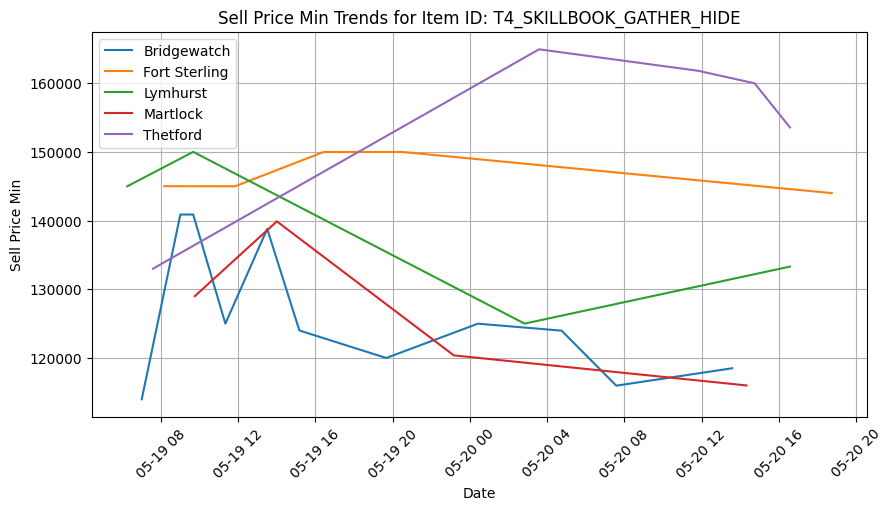

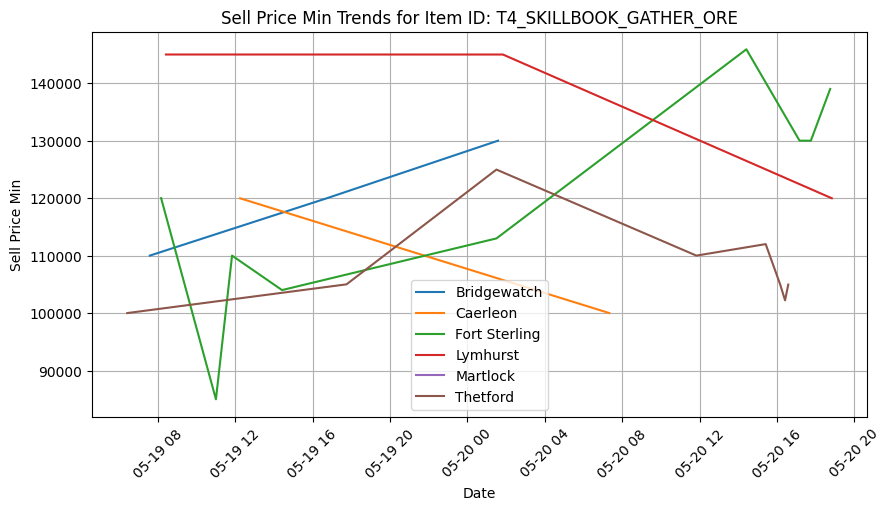

MySQL connection is closed


In [1]:
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def query_data():
    try:
        # Establish a database connection
        db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="val094256",
        database="albion"
    )

        if db.is_connected():
            print("Connected to MySQL database")

            # Create a cursor object
            cursor = db.cursor()

            # Define the query
            query = """
            SELECT 
                item_id, city, quality, sell_price_min, sell_price_min_date, 
                sell_price_max, sell_price_max_date, buy_price_min, buy_price_min_date, 
                buy_price_max, buy_price_max_date, updated_date 
            FROM 
                current_data

            where item_id = 'T4_SKILLBOOK_GATHER_HIDE' or item_id = 'T4_SKILLBOOK_GATHER_ORE'
                
            """

            # Execute the query
            cursor.execute(query)

            # Fetch all rows from the executed query
            result = cursor.fetchall()

            # Convert the result to a pandas DataFrame
            df = pd.DataFrame(result, columns=[
                'item_id', 'city', 'quality', 'sell_price_min', 'sell_price_min_date', 
                'sell_price_max', 'sell_price_max_date', 'buy_price_min', 'buy_price_min_date', 
                'buy_price_max', 'buy_price_max_date', 'updated_date'
            ])

            # Convert date columns to datetime with error handling
            df['sell_price_min_date'] = pd.to_datetime(df['sell_price_min_date'], errors='coerce')

            upper_limit= 200000
            df = df[df['sell_price_min'] <= upper_limit]

            # Group data by item_id
            item_ids = df['item_id'].unique()
            for item_id in item_ids:
                item_data = df[df['item_id'] == item_id]
                cities = item_data['city'].unique()

                # Plot data for each city
                plt.figure(figsize=(10, 5))
                for city in cities:
                    city_data = item_data[item_data['city'] == city]
                    if city == 'Thetford':
                        color = 'purple'
                    elif city == 'Fort Sterling':
                        color = 'lightblue'
                    elif city == 'Lymhurst':
                        color = 'green'
                    elif city == 'Bridgewatch':
                        color = 'orange'
                    elif city == 'Martlock':
                        color = 'blue'
                    elif city == 'Carleon':
                        color = 'red'
                    else:
                        color = 'black'  # default color
                    plt.plot(city_data['sell_price_min_date'], city_data['sell_price_min'], label=city)

                plt.xlabel('Date')
                plt.ylabel('Sell Price Min')
                plt.title(f'Sell Price Min Trends for Item ID: {item_id}')
                plt.legend()
                plt.xticks(rotation=45)
                plt.grid(True)
                plt.show()

    except Error as e:
        print("Error while connecting to MySQL", e)

    finally:
        if db.is_connected():
            cursor.close()
            db.close()
            print("MySQL connection is closed")

# Call the function to query data and generate diagrams
query_data()